In [1]:
from density_comparator import lsdir, DensityComparator, symbols, combinations, dJS, dKL
import numpy as np
from pandas import DataFrame
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
root = "/home/t/r1r2/kaush"
protein_paths = lsdir("/home/t/r1r2/kaush", exclude=[".py","sj", "elvim", "png", "ELViM", "X", "weights", "density"])[::-1]
proteins = [f"{symbols('alpha')}-Synuclein", "PaaA2", "ACTR", "drkN-SH3", f"A{symbols('beta')}-40"]
force_feilds = ["a99SBdisp", "Charmm36m", "c22star-TIP3P"]
ff_pairs = ["/".join(i.tolist()) for i in combinations(force_feilds)]
ff_intra = ["/".join(i) for i in np.stack(2 * [np.array(force_feilds)], 1).tolist()]
weight_files = [[lsdir(f"{path}/{ff}", keyword="weight") for ff in force_feilds] for path in protein_paths]
elvim_files = [lsdir(f"{path}/elvim", keyword="cat", exclude="npy")[0] for path in protein_paths]
weights = np.stack([np.stack([np.loadtxt(lsdir(f"{path}/{ff}", keyword="weight")[0])[1:][::2] for ff in force_feilds]) for path in protein_paths])
weights /= weights.sum(-1, keepdims=True)
elvim = np.stack([np.stack([i[1:] for i in np.array_split(np.loadtxt(lsdir(f"{path}/elvim", keyword="cat", exclude="npy")[0]), 3)]) for path in protein_paths])

/home/t/r1r2/kaush/density_comparision/density_comparator.py:396: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


In [3]:
kwargs = dict(
               bins = 25,
               n_contours = 6,
               density = True,
               extend_border = 0.6,
               scatter_stride = 30,
               alpha_lines=0.35,
               mask_thresh=0.006,
               alpha_contours=0.5,
               contour_lines=True,
               mask=False,
               scatter=True,
               scatter_alpha = .2,
               scatter_size=.05,
               scatter_max=.9,
               scatter_min=0.5,
               scatter_cmap="coolwarm_r",
               cmap="coolwarm",
               share_extent=True,
               figsize=(11.5, 3)
    
            )

In [ ]:
overlaps = []
bins_array = np.arange(50, 5000, 50)
for bins in bins_array:
    dens.estimate_hist(bins=bins)
    dens.estimate_hist(bins=bins, weight=True)
    overlaps.append(dens.compare("hists", pairs = np.array([[0, 0]]), weight0=False, weight1=True)**2)

Text(0.5, 1.0, 'PaaA2 - a99SBdisp\nUnbiased / Reweighted Self Overlap Integral')

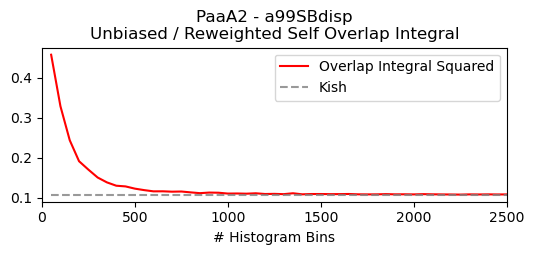

In [77]:
plt.figure(figsize=(6, 2))
plt.plot(bins_array, overlaps, color="red", label="Overlap Integral Squared")
plt.hlines(0.10740822, bins_array[0], bins_array[-1], color="gray", label="Kish", ls="--", alpha=0.8)
#plt.ylabel("Overlap Integral Squared")
plt.xlabel("# Histogram Bins")
plt.legend()
plt.xlim(0, 2500)
plt.title(proteins[1] + " - " + force_feilds[0]+"\n" + "Unbiased / Reweighted Self Overlap Integral")

In [7]:
from writhe_tools.stats import DensityComparator

 # 100 Bins

In [47]:
metrics = (None, dJS, dKL)[:1]
bins = 100
df_captions = ("Unbiased + Reweighted Overlap between datasets", 
               "Unbiased / Reweighted Self Overlap")

metric_names = "Overlap Integral,JS,KL".split(",")[:1]
for index in range(5):
    
    dens = DensityComparator(data=[i for i in elvim[index]],
                         weights=[i for i in weights[index]],)
    
    dens.estimate_hist(bins=bins);dens.estimate_hist(weight=True, bins=bins)


    
    for metric, metric_name in zip(metrics, metric_names):
        
        print(f"Similarity Metrics and densities used to compute them for {proteins[index]}")

        df = DataFrame(data=np.stack([dens.compare("hists", metric=metric),
                                      dens.compare("hists", weight=True, metric=metric)]) * 100, 
                           index="Unbiased,Reweighted".split(","),
                           columns=ff_pairs)
        
        df_inter = DataFrame(data=dens.compare("hists",
                                               pairs = np.stack(np.diag_indices(3), 1),
                                               weight0=True,
                                               weight1=False).reshape(1, -1) * 100,
                             index=["Unbiased/Reweighted"],
                             columns=np.array(ff_intra))
        
        
        df.columns.name = f"{proteins[index]} : {metric_name}"
        df_inter.columns.name = f"{proteins[index]} : {metric_name}"
        
        for frame, caption in zip([df, df_inter], df_captions):
            styler = frame.style
            styler.set_caption(caption)
            display(styler)
        
        
    



Similarity Metrics and densities used to compute them for α-Synuclein


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


α-Synuclein : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,0.250211,0.071798,0.003275
Reweighted,1.514839,1.648155,0.159438


α-Synuclein : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,65.428097,53.994878,90.125985


Similarity Metrics and densities used to compute them for PaaA2


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


PaaA2 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,0.270855,0.827643,0.046968
Reweighted,0.750825,3.739300,2.002563


PaaA2 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,57.317807,55.732911,55.710184


Similarity Metrics and densities used to compute them for ACTR


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


ACTR : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,52.138696,5.504234,13.386834
Reweighted,23.344650,20.823628,25.102147


ACTR : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,71.133042,58.335706,59.532073


Similarity Metrics and densities used to compute them for drkN-SH3


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


drkN-SH3 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,2.168315,12.153768,5.882268
Reweighted,13.460057,23.597395,18.495232


drkN-SH3 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,72.573252,57.723683,53.936549


Similarity Metrics and densities used to compute them for Aβ-40


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


Aβ-40 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,36.055208,24.286667,23.201121
Reweighted,33.360566,23.510268,25.530921


Aβ-40 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,54.584758,76.261612,66.099126


 # 500 Bins!

In [48]:
metrics = (None, dJS, dKL)[:1]
bins = 500
df_captions = ("Unbiased + Reweighted Overlap between datasets", 
               "Unbiased / Reweighted Self Overlap")

metric_names = "Overlap Integral,JS,KL".split(",")[:1]
for index in range(5):
    
    dens = DensityComparator(data=[i for i in elvim[index]],
                         weights=[i for i in weights[index]],)
    
    dens.estimate_hist(bins=bins);dens.estimate_hist(weight=True, bins=bins)


    
    for metric, metric_name in zip(metrics, metric_names):
        
        print(f"Similarity Metrics and densities used to compute them for {proteins[index]}")

        df = DataFrame(data=np.stack([dens.compare("hists", metric=metric),
                                      dens.compare("hists", weight=True, metric=metric)]) * 100, 
                           index="Unbiased,Reweighted".split(","),
                           columns=ff_pairs)
        
        df_inter = DataFrame(data=dens.compare("hists",
                                               pairs = np.stack(np.diag_indices(3), 1),
                                               weight0=True,
                                               weight1=False).reshape(1, -1) * 100,
                             index=["Unbiased/Reweighted"],
                             columns=np.array(ff_intra))
        
        
        df.columns.name = f"{proteins[index]} : {metric_name}"
        df_inter.columns.name = f"{proteins[index]} : {metric_name}"
        
        for frame, caption in zip([df, df_inter], df_captions):
            styler = frame.style
            styler.set_caption(caption)
            display(styler)
        
        
    



Similarity Metrics and densities used to compute them for α-Synuclein


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


α-Synuclein : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,0.093968,0.036071,0.000000
Reweighted,0.075682,0.352074,0.000000


α-Synuclein : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,41.273631,39.217487,75.774624


Similarity Metrics and densities used to compute them for PaaA2


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


PaaA2 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,0.080326,0.343985,0.006935
Reweighted,0.016529,0.601309,0.026425


PaaA2 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,35.017518,35.702114,40.079205


Similarity Metrics and densities used to compute them for ACTR


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


ACTR : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,13.684679,2.147689,4.330794
Reweighted,1.666352,1.736987,2.225829


ACTR : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,40.585096,36.500878,36.688228


Similarity Metrics and densities used to compute them for drkN-SH3


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


drkN-SH3 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,0.698721,4.935354,2.334178
Reweighted,0.837577,2.288359,1.033876


drkN-SH3 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,39.518204,38.135626,35.532337


Similarity Metrics and densities used to compute them for Aβ-40


/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((
/home/t/r1r2/kaush/density_comparision/density_comparator.py:210: UserWarning: Using densities defined by histograms in the computation of a comparision metric can cause counter intuitive results because empty bins are masked out to prevent nans
  warnings.warn((


Aβ-40 : Overlap Integral,a99SBdisp/Charmm36m,a99SBdisp/c22star-TIP3P,Charmm36m/c22star-TIP3P
Unbiased,7.825166,6.380722,6.629526
Reweighted,2.205768,1.669289,2.227440


Aβ-40 : Overlap Integral,a99SBdisp/a99SBdisp,Charmm36m/Charmm36m,c22star-TIP3P/c22star-TIP3P
Unbiased/Reweighted,36.604780,52.417490,39.241536


metrics = (None, dJS, dKL)
bins = 500
metric_names = "Overlap Integral,JS,KL".split(",")
for index in range(5):
    
    dens = DensityComparator(data=[i for i in elvim[index]],
                         weights=[i for i in weights[index]],)
    
    dens.estimate_hist(bins=bins);dens.estimate_hist(weight=True, bins=bins)
    dens.estimate_kde(bins=bins); dens.estimate_kde(bins=bins, weight=True)
    
    dens.plot_kde(dscr=proteins[index], dscrs=force_feilds)
    dens.plot_kde(dscr=proteins[index], dscrs=force_feilds, weight=True)
    
    dens.plot_hist(dscrs=force_feilds, weight=False, kwargs=kwargs, title=proteins[index])
    plt.savefig("./actr_elvim_unbiased.png", bbox_inches="tight", dpi=1000)

    dens.plot_hist(dscrs=force_feilds, weight=True, kwargs=kwargs, title=proteins[index])
    plt.savefig("./actr_elvim_reweighted.png", bbox_inches="tight", dpi=1000)


    
    for metric, metric_name in zip(metrics, metric_names):
        
        print(f"Similarity Metrics and densities used to compute them for {proteins[index]}")

        df = DataFrame(data=np.stack([dens.compare("hists", metric=metric),
                                      dens.compare("hists", weight=True, metric=metric)]), 
                           index="Unbiased,Reweighted".split(","),
                           columns=ff_pairs)
        
        df.columns.name = f"{proteins[index]} : {metric_name}"
    
        display(df)
        
    break
    

